# 🚜 Predicting the Sale Price of Bulldozers using Machine Learning 

In this notebook, we're trying to predict the sale price of bulldozers based on the past prices.

We're going to take the following approach:
1. [Problem Definition](#definition)
2. [Data](#data) 
3. [Evaluation](#evaluation)
4. [Features](#features)
5. [Modelling](#modelling)
6. [Experimentation](#experimentation)

## <a name="definition">1. Problem Definition</a>

In a statement, 
> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## <a name="data">2. Data</a>

[Blue Book for Bulldozers - Kaggle Version](https://www.kaggle.com/c/bluebook-for-bulldozers/overview)

There are 3 datasets:
1. **Train.csv** - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including `SalePrice` which is the **target variable**).
2. **Valid.csv** - Historical bulldozer sales examples from January 1 2012 to April 30 2012 (close to 12,000 examples with the same attributes as **Train.csv**).
3. **Test.csv** - Historical bulldozer sales examples from May 1 2012 to November 2012 (close to 12,000 examples but missing the `SalePrice` attribute, as this is what we'll be trying to predict).


## <a name="evaluation">3.Evaluation</a>



For this problem, [Kaggle has set the evaluation metric to being root mean squared log error (RMSLE)](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation). 

As with many regression evaluations, the goal will be to get this value as low as possible.

To see how well our model is doing, we'll calculate the RMSLE and then compare our results to others on the [Kaggle leaderboard](https://www.kaggle.com/c/bluebook-for-bulldozers/leaderboard).

## <a name="features">4.Features</a>

Based on the provided Data Dictionary.xls:

**SalesID** -   unique identifier of a particular sale of a machine at auction

**MachineID** -   identifier for a particular machine;  machines may have multiple sales

**ModelID** -   identifier for a unique machine model (i.e. fiModelDesc)

**datasource** -   source of the sale record;  some sources are more diligent about reporting attributes of the machine than others.  Note that a particular datasource may report on multiple auctioneerIDs.

**auctioneerID** -   identifier of a particular auctioneer, i.e. company that sold the machine at auction.  Not the same as datasource.

**YearMade** -   year of manufacturer of the Machine

**MachineHoursCurrentMeter** -   current usage of the machine in hours at time of sale (saledate);  null or 0 means no hours have been reported for that sale

**UsageBand** -   value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage for the fiBaseModel;  e.g. 'Low' means this machine has less hours given it's lifespan relative to average of fiBaseModel.

**Saledate** -   time of sale

**Saleprice** -   cost of sale in USD

**fiModelDesc** -   Description of a unique machine model (see ModelID); concatenation of fiBaseModel & fiSecondaryDesc & fiModelSeries & fiModelDescriptor

**fiBaseModel** -   disaggregation of fiModelDesc

**fiSecondaryDesc** -   disaggregation of fiModelDesc

**fiModelSeries** -   disaggregation of fiModelDesc

**fiModelDescriptor** -   disaggregation of fiModelDesc

**ProductSize** -   Don't know what this is 

**ProductClassDesc** -   description of 2nd level hierarchical grouping (below ProductGroup) of fiModelDesc

**State** -   US State in which sale occurred

**ProductGroup** -   identifier for top-level hierarchical grouping of fiModelDesc

**ProductGroupDesc** -   description of top-level hierarchical grouping of fiModelDesc

**Drive_System** - machine configuration;  typcially describes whether 2 or 4 wheel drive

**Enclosure** - machine configuration - does machine have an enclosed cab or not

**Forks** - machine configuration - attachment used for lifting

**Pad_Type** - machine configuration - type of treads a crawler machine uses

**Ride_Control** - machine configuration - optional feature on loaders to make the ride smoother

**Stick** - machine configuration - type of control 

**Transmission** - machine configuration - describes type of transmission;  typically automatic or manual

**Turbocharged** - machine configuration - engine naturally aspirated or turbocharged

**Blade_Extension** - machine configuration - extension of standard blade

**Blade_Width** - machine configuration - width of blade

**Enclosure_Type** - machine configuration - does machine have an enclosed cab or not

**Engine_Horsepower** - machine configuration - engine horsepower rating

**Hydraulics** - machine configuration - type of hydraulics

**Pushblock **- machine configuration - option

**Ripper** - machine configuration - implement attached to machine to till soil

**Scarifier** - machine configuration - implement attached to machine to condition soil

**Tip_control** - machine configuration - type of blade control

**Tire_Size** - machine configuration - size of primary tires

**Coupler** - machine configuration - type of implement interface

**Coupler_System** - machine configuration - type of implement interface

**Grouser_Tracks** - machine configuration - describes ground contact interface

**Hydraulics_Flow** - machine configuration - normal or high flow hydraulic system

**Track_Type** - machine configuration - type of treads a crawler machine uses

**Undercarriage_Pad_Width** - machine configuration - width of crawler treads

**Stick_Length** - machine configuration - length of machine digging implement

**Thumb** - machine configuration - attachment used for grabbing

**Pattern_Changer** - machine configuration - can adjust the operator control configuration to suit the user

**Grouser_Type** - machine configuration - type of treads a crawler machine uses

**Backhoe_Mounting** - machine configuration - optional interface used to add a backhoe attachment

**Blade_Type** - machine configuration - describes type of blade

**Travel_Controls** - machine configuration - describes operator control configuration

**Differential_Type** - machine configuration - differential type, typically locking or standard

**Steering_Controls** - machine configuration - describes operator control configuration

---------

 ## Load data

In [1]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from scikit-learn
from sklearn.ensemble import RandomForestRegressor

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
df = pd.read_csv('data/TrainAndValid.csv', low_memory=False)

## Exploratory Data Analysis (EDA)

1. What question(s) are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What are the missing data and how are we going to handle them?
4. What are the outliers, why we care about them and how are we going to handle them?
5. How can we add, change or remove features to get more out of the data?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
# check missing data
df.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

We can see there are a lot of missing data that we need to handle later.

In [5]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

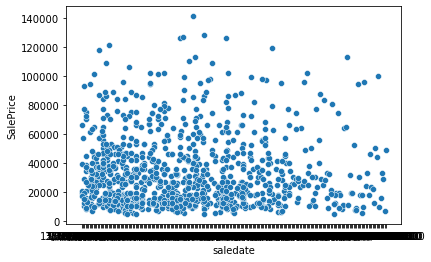

In [6]:
# As the initial task, we want to see SalePrice and Date visually
# Dataset is too large, so we want to look at only 1000 points

sns.scatterplot(data=df[:1000], x='saledate', y='SalePrice' );

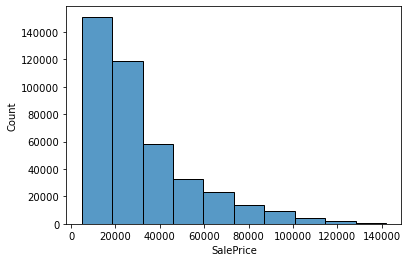

In [7]:
sns.histplot(data=df, x='SalePrice', bins=10);

### Parsing dates

When we work with time series data, we want to enrich time & date component as much as possible.

So we will convert our related date/time column accordingly.

In [8]:
df['saledate'].dtype

dtype('O')

In [9]:
# reimport data while parsing datetime object correctly
df = pd.read_csv('data/TrainAndValid.csv', low_memory=False, parse_dates=['saledate'])

In [10]:
df['saledate'].dtype

dtype('<M8[ns]')

In [11]:
df['saledate'].head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

now we can see that saledate is correctly parsed.

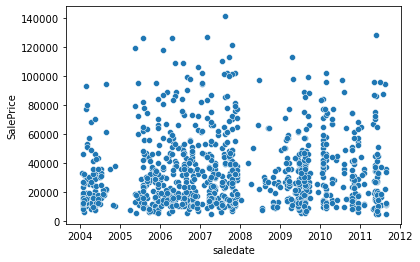

In [12]:
sns.scatterplot(data=df[:1000], x='saledate', y='SalePrice');

In [13]:
df.head(2).T

,0,1
SalesID,1139246,1139248
SalePrice,66000,57000
MachineID,999089,117657
ModelID,3157,77
datasource,121,121
auctioneerID,3,3
YearMade,2004,1996
MachineHoursCurrentMeter,68,4640
UsageBand,Low,Low
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00


In [14]:
df['saledate'].head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort data by Saledate

When working with timeseries data, it is good idea to sort it by date

In [15]:
# sort dataframe by date order
df = df.sort_values(by=['saledate'], ascending=True)

df['saledate'].head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make copy of original dataframe

We also want to keep copy original dataframe, so that there won't be any impact when we do data manipulation.

In [16]:
df_temp = df.copy()

In [17]:
df_temp.head(2)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


### Add pandas DateTimeIndex as additional columns for `saledate`
* [Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html)
* this will allow us to use additional features in an easy and quick way via `Attributes`

In [18]:
df_temp[:5].saledate.dt.year

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
Name: saledate, dtype: int64

In [19]:
# we will add Year, Month, Day as additional columns
df_temp['saleYear'] = df_temp['saledate'].dt.year
df_temp['saleMonth'] = df_temp['saledate'].dt.month
df_temp['saleDay'] = df_temp['saledate'].dt.day
df_temp['saleDayOfWeek'] = df_temp['saledate'].dt.dayofweek
df_temp['saleDayOfYear'] = df_temp['saledate'].dt.dayofyear

In [20]:
df_temp.head(2)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31


Now we have enriched the saledate column with additional features, we will remove the orignial saledate column.

In [21]:
df_temp = df_temp.drop('saledate', axis=1)

In [22]:
df_temp.head(2)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31


#### check random check of other columns

In [23]:
df_temp['state'].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [24]:
len(df_temp)

412698

------

In [25]:
df_temp.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleDay', 'saleDayOfWeek', 'saleDayOfYear'],
      dtype

--------

## Convert String to Categories

We have multiple String type columns in dataset. Each String value (such as Low, Medium, High) doesn't mean much for machine. We might want to turn those related string values into a group of categories.

We can achieve by converting the columns with the string datatype into a category datatype.

To do this we can use the [pandas types API](https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-related-functionality) which allows us to interact and manipulate the types of data.

In [26]:
df_temp.head(2).T

,205615,274835
SalesID,1646770,1821514
SalePrice,9500,14000
MachineID,1126363,1194089
ModelID,8434,10150
datasource,132,132
auctioneerID,18,99
YearMade,1974,1980
MachineHoursCurrentMeter,NaN,NaN
UsageBand,NaN,NaN
fiModelDesc,TD20,A66


### Find and Gather columns of string type in dataframe

In [27]:
string_columns = []

for col_name, value in df_temp.items():
        if pd.api.types.is_string_dtype(value):
            string_columns.append(col_name)
            
len(string_columns), string_columns

(44,
 ['UsageBand',
  'fiModelDesc',
  'fiBaseModel',
  'fiSecondaryDesc',
  'fiModelSeries',
  'fiModelDescriptor',
  'ProductSize',
  'fiProductClassDesc',
  'state',
  'ProductGroup',
  'ProductGroupDesc',
  'Drive_System',
  'Enclosure',
  'Forks',
  'Pad_Type',
  'Ride_Control',
  'Stick',
  'Transmission',
  'Turbocharged',
  'Blade_Extension',
  'Blade_Width',
  'Enclosure_Type',
  'Engine_Horsepower',
  'Hydraulics',
  'Pushblock',
  'Ripper',
  'Scarifier',
  'Tip_Control',
  'Tire_Size',
  'Coupler',
  'Coupler_System',
  'Grouser_Tracks',
  'Hydraulics_Flow',
  'Track_Type',
  'Undercarriage_Pad_Width',
  'Stick_Length',
  'Thumb',
  'Pattern_Changer',
  'Grouser_Type',
  'Backhoe_Mounting',
  'Blade_Type',
  'Travel_Controls',
  'Differential_Type',
  'Steering_Controls'])

### Now we convert String column into Categorical types

In [28]:
for col_name, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[col_name] = content.astype('category').cat.as_ordered()  #convert into Ordered category data type

Now we can see that those columns are convered into `category` data type.

In [29]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [30]:
# check state column
# as it is now category, we need to access using cat
df_temp['state'].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

**Thanks to pandas Categroy, we now have a way to access all our data in a form of numbers.**

As in below example, we can access `state` columns value as numbers.

In [33]:
# get the categorical codes
df_temp['state'].cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

 Now we need to handle missing data.

### check the Ratio of missing data


In [34]:
df_temp.isnull().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save the preprocessed data

In [36]:
# export the current temp dataframe

df_temp.to_csv('data/preprocessed/train_tmp.csv', index=False)

-------

## Fill Missing Values - Numerical variables

In [43]:
# check which columns are numeric data type
for col, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(col)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [44]:
# check which numeric columns have missing values
for col, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        missing_counts = df_temp[col].isnull().sum()
        if  missing_counts > 0:
            print('{} has total {} missing data.'.format(col, missing_counts))

auctioneerID has total 20136 missing data.
MachineHoursCurrentMeter has total 265194 missing data.


### Add is_missing flag and fill with median value

* we will put `is_missing` : true or false flag for those columns, before we fill in. The reason is we want to make sure we keep track of changes and we don't know yet there may be an underlying reason why those values are missing in the first place.


* fill with `median` value. We use median value instead of mean value because mean is sensitive to outliers. If the dateset is skewed one, mean value will be impacted by those outliers value. To avoid this, we will use median instead.

In [46]:
for col, content in df_temp.items():
    # check numeric data type
    if pd.api.types.is_numeric_dtype(content):
        # check has some missing count
        if pd.isnull(content).sum():
            # step 1) add col_name_is_missing flag (true/false)
            df_temp[col+'_is_missing'] = pd.isnull(content)

            # step 2) fill with median value, if it has missing content value
            df_temp[col] = content.fillna(content.median())

In [47]:
# confirm to check whether there are missing values for numeric columns

for col, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        missing_counts = df_temp[col].isnull().sum()
        if  missing_counts > 0:
            print('{} has total {} missing data.'.format(col, missing_counts))

Great. There is no missing value for Numeric columns anymore. 

And we can also see there are 2 new columns for auctioneerID_is_missing	and MachineHoursCurrentMeter_is_missing with True/False value.

In [48]:
df_temp.head(2)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,NaN,TD20,...,None or Unspecified,NaN,NaN,1989,1,17,1,17,False,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,NaN,A66,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True


In [49]:
df_temp['auctioneerID_is_missing'].value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [50]:
df_temp['MachineHoursCurrentMeter_is_missing'].value_counts()

True     265194
False    147504
Name: MachineHoursCurrentMeter_is_missing, dtype: int64

In [53]:
df_temp[df_temp['auctioneerID_is_missing'] == True].head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
340946,2357213,37000.0,1702442,22172,136,2.0,2003,9044.0,High,750CIILGP,...,None or Unspecified,NaN,NaN,2003,12,8,0,342,True,False
327120,2331246,21500.0,1700283,8265,136,2.0,1000,0.0,NaN,670,...,NaN,NaN,NaN,2007,3,14,2,73,True,False
349532,2410578,22000.0,1386646,198,136,2.0,1000,0.0,NaN,D32P-1,...,None or Unspecified,NaN,NaN,2007,3,14,2,73,True,False
330190,2338305,48000.0,1705197,4701,136,2.0,1999,5900.0,Medium,544H,...,NaN,Standard,Conventional,2007,3,14,2,73,True,False
312538,2274219,36000.0,1779952,4139,136,2.0,1976,0.0,NaN,D7G,...,None or Unspecified,NaN,NaN,2007,3,14,2,73,True,False


In [54]:
df_temp[df_temp['MachineHoursCurrentMeter_is_missing'] == True].head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,NaN,TD20,...,None or Unspecified,NaN,NaN,1989,1,17,1,17,False,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,NaN,A66,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,NaN,D7G,...,None or Unspecified,NaN,NaN,1989,1,31,1,31,False,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,NaN,A62,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,NaN,D3B,...,Lever,NaN,NaN,1989,1,31,1,31,False,True


-----

## Filling Missing values and Categorical variables into numbers

In [58]:
# check for which aren't numeric
for col, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
            print(col)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


#### Get the categorical values of specific column

We can see that for `state` column, there are 53 categories.

In [59]:
# let's get sample state as categorical values
# get the Categorical columns => then get this column
pd.Categorical(df_temp['state'])

['Texas', 'Florida', 'Florida', 'Florida', 'Florida', ..., 'California', 'California', 'California', 'California', 'California']
Length: 412698
Categories (53, object): ['Alabama' < 'Alaska' < 'Arizona' < 'Arkansas' ... 'Washington DC' < 'West Virginia' < 'Wisconsin' < 'Wyoming']

In [61]:
# this returns codes value of each category 
pd.Categorical(df_temp['state']).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

### Turn categorical variables into numbers and fill missing ones

#### Add is_missing flag and fill with number + 1

* we will put `is_missing` : true or false flag for those columns, before we fill in. The reason is we want to make sure we keep track of changes and we don't know yet there may be an underlying reason why those values are missing in the first place.


* get the `codes` value of category


* increase `codes+1` and fill with that value. The reason we do this is because when pandas turn category into number code, it define integer such as 1, then increment it by 1 so that each category code value will be unique. So we will also following this principle and increment by 1 for the newly filled in `missing category` value.

In [63]:
for col, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):   
            # Step 1) add is_missing flag (true/false)
            df_temp[col+'_is_missing'] = pd.isnull(content) # return True/False
            
            # Step 2) turn category into number and add 1, then fill in those missing slots
            df_temp[col] = pd.Categorical(content).codes + 1

In [69]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 81.1 MB


In [68]:
df_temp.head(2).T

,205615,274835
SalesID,1646770,1821514
SalePrice,9500,14000
MachineID,1126363,1194089
ModelID,8434,10150
datasource,132,132
...,...,...
Backhoe_Mounting_is_missing,False,True
Blade_Type_is_missing,False,True
Travel_Controls_is_missing,False,True
Differential_Type_is_missing,True,False


In [73]:
# confirm is there any columns with missing values
df_temp.isnull().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

## <a name="modelling">5. Modelling</a>

In [ ]:
# split features and labels

X = df_temp.drop('SalePrice', axis=1)
y = df_temp['SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=100, 
                                                      n_jobs=-1, 
                                                      random_state=42)

In [ ]:
model.fit(X_train, y_train)